#  Derivation of a nonlinear delayed oscillator (NDO)

Pedro Di Nezio (pdn@ig.utexas.edu) <br>
Martin Puy (martin.puy@utexas.edu) <br>
Institute for Geophysics, University of Texas at Austin

## Introduction

This notebook computes a series of matrices and coefficients required to formulate a nonlinear delayed oscillator (NDO) equation of El Niño/Southern Oscillation (ENSO). Oscillator equations have been extremely popular conceptual models of ENSO (e.g. Suarez and Schopf 1988, Battisti and Hirst 1989, Jin 1997). These simple models simulate the variability in sea-surface temperatures (SST) in the central equatorial Pacific, the center of action of ENSO. All physical processes responsible for growth and decay of SST anomalies are encapsulated in the right hand side of the following equation:

<br>

$$ \frac{\partial T'(t)}{\partial t} = aT'(t) -bT'(t-t_0)-cT'^3(t) \;\;\;\;      (1),$$
<br>
           
where $a$, $b$, $c$, and $t_{0}$ are positive constants.

Equation (1) produces SST variability akin to observed in the central/eastern equatorial Pacific for reasonable values of the parameters. However, recent observational and modelling studies show that ENSO is a more complex phenomenon, and therefore this, and other conceptual models of ENSO, maybe oversimplistic.

Equation (1) produces warm and cold events with equal amplitude and duration. Observed El Niño and La Niña, in contrast, show pronounced asymmetries in their amplitude and duration. More importantly, Equation (1) generates variability under unstable regimes as discussed in Suarez and Schopf (1988). In this regime an El Niño event leads to a subsequent La Niña event, which then leads to an El Niño, in an endeless succession of warm and cold events. Observations, in contrast, show a distinct break in this cycle during La Niña, which tend to persist for multiple years, and rarely trigger a subsequent El Niño (Kessler 2002). According to this observation, El Niño events are in fact event‐like disturbances initiated by external pertubations not contained in the dynamics of the ENSO cycle itself. 

Some of these questions can be explored including nonlinearities in the ENSO feedbacks, $a$, $b$, $c$. As shown by Choi et al. (2013) and DiNezio and Deser (2014), asymmetries (i.e. nonlinearitiy) in the delayed thermocline feedback represented by the $-bT(t-T_0)$ term of (1) can cause asymmetric duration of El Niña vs. La Niña. Here we follow the approach of DiNezio and Deser (2014) to derive a NDO that includes seasonality and nonlinearities in all feedbacks. Thanks to these dependencies this simple zero-dimensional model can capture multiple features of ENSO simulated in complex tridimensional models. These features are the seasonal modulation of ENSO amplitude, variability with a broad spectral peak at 3 to 5 years, and asymmetries between El Niño and La Niña. The resulting model provides a simple framework for conceptualizing the effects of the seasonal cycle, nonlinearities, and noise on ENSO dynamics, as well as a powerful diagnostic tool for analyzing ENSO dynamics in coupled general circulation models (GCMs). 

The derivation presented here is based on temperature tendencies obtained from a heat budget to be computed separately from this notebook. The heat budget can be computed using output from a coupled GCM, or from an ocean reanalysis. The tendencies have to be averaged over the Nino-3.4 region, or a similar region in the model where sea-surface temperature (SST) variability is strongly coupled to wind and ocean dynamics. The files Heat_budget_0ka.npy and Heat_budget_21ka.npy contain tendencies averaged over the Nino-3.4 region from simulations of pre-industrial (0ka) and Last Glacial Maximum (21ka) climate performed with version 1 of the Community Earth System Model (CESM1).


#### References

Suarez, M.J. and P.S. Schopf, 1988: A Delayed Action Oscillator for ENSO. _J. Atmos. Sci._, __45__, 3283–3287, <a href="https://doi.org/10.1175/1520-0469(1988)045<3283:ADAOFE>2.0.CO;2">https://doi.org/10.1175/1520-0469(1988)045<3283:ADAOFE>2.0.CO;2</a>
    
Battisti, D.S. and A.C. Hirst, 1989: Interannual Variability in a Tropical Atmosphere–Ocean Model: Influence of the Basic State, Ocean Geometry and Nonlinearity. _J. Atmos. Sci._, __46__, 1687–1712, <a href="https://doi.org/10.1175/1520-0469(1989)046<1687:IVIATA>2.0.CO;2">https://doi.org/10.1175/1520-0469(1989)046<1687:IVIATA>2.0.CO;2</a>
    
Jin, F., 1997: An Equatorial Ocean Recharge Paradigm for ENSO. Part I: Conceptual Model. _J. Atmos. Sci._, __54__, 811–829, <a href="https://doi.org/10.1175/1520-0469(1997)054<0811:AEORPF>2.0.CO;2">https://doi.org/10.1175/1520-0469(1997)054<0811:AEORPF>2.0.CO;2</a>
    
Kessler, W.S., 2002: Is ENSO a cycle or a series of events? _Geophys. Res. Lett._, __29__(23), 2125, <a href="https://doi.org/10.1029/2002GL015924">https://doi.org/10.1029/2002GL015924</a>

DiNezio, P.N. and C. Deser, 2014: Nonlinear Controls on the Persistence of La Niña. _J. Climate_, __27__, 7335–7355, [https://doi.org/10.1175/JCLI-D-14-00033.1](https://doi.org/10.1175/JCLI-D-14-00033.1)

Choi, K., G.A. Vecchi, and A.T. Wittenberg, 2013: ENSO Transition, Duration, and Amplitude Asymmetries: Role of the Nonlinear Wind Stress Coupling in a Conceptual Model. _J. Climate_, __26__, 9462–9476, [https://doi.org/10.1175/JCLI-D-13-00045.1](https://doi.org/10.1175/JCLI-D-13-00045.1) 


In [293]:
# Import necessary modules 
import numpy as np
import scipy.io

# Modules used for the exponential fits 
from scipy.optimize import curve_fit
import pandas as pd

# Defaultdict
from collections import defaultdict

# Plots attributes 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from datetime import datetime
import calendar
import string

# Correlogram PSD function 
from spectrum import *

# Generate random skewed noise 
from scipy.stats import skewnorm

# Seaborn for distributions plots.
import seaborn as sns
sns.reset_orig()

# Stat modules 
from scipy.stats import skew
from scipy import stats
from scipy.interpolate import interp1d

# Solver 
from scipy.optimize import fsolve

# Miscellaneous 
from IPython.display import display,HTML
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [311]:
# Choose the case 0ka or 21ka here.
CASE='0ka'

In [312]:
# Load the heat budget file including Mixed layer tendencies and various variables averaged in Niño3.4 region. 
heat_budget=np.load('Heat_budget_'+CASE+'.npy').item()

## The nonlinear delayed oscillator

Our NDO equation is:

<br>

$$ \frac{\partial T'(t)}{\partial t} = aT'(t) -bT'(t-t_0)-cT'(t)-dT'(t)+N(t)  \;\;\;\;      (2),$$
<br>
           
where $aT'$ represents the tendencies arising from the positive Bjerknes feedback, $-bT'(t-t_0)$ the tendencies due to the negative delayed thermocline feedback, $-cT'$ the effect of atmospheric damping, and $-dT'$ the effect of non-linear damping due to ocean dynamics. _N(t)_ is external noise which will be needed to excited variability because, as we will show, ENSO in CESM1 operates in a stable or damped regime. Here $a$, $b$, $c$ and $d$ are nonlinear functions of $T'(t)$ or $T'(t-t_{0})$ and the calendar month. The $t_{0}$ lag is computed as the lag that maximizes the anticorrelation between $T'$ and the zonally-averaged thermocline depth anomalies. The value is $t_0$ = 5 months, for both the 0ka and 21ka simulations.

For simplicity $N(t)$ is white Gaussian noise with a decorrelation timescale of one month and amplitude to be determined.

### Computation of the feedback functions $a$, $b$, $c$, and $d$

The derivation of the $a$, $b$, $c$, $d$ functions in (2) starts by fitting the right hand side terms of the following heat budget equation: 

<br>
$$\frac{\partial T'(t)}{\partial t} =-\Bigg(u'.\frac{\overline{\partial T}}{\partial x}+\overline{u}.\frac{\partial T'}{\partial x}+u'.\frac{\partial T'}{\partial x}+v'.\frac{\overline{\partial T}}{\partial y}+\overline{v}.\frac{\partial T'}{\partial y}+v.\frac{\partial T'}{\partial y}+w'.\frac{\overline{\partial T}}{\partial z}+\overline{w}.\frac{\partial T'}{\partial z}+w'.\frac{\partial T'}{\partial z}\Bigg) + \frac{Q_{atm}}{\rho C_{p}H}\;\;\;\;\;\; (3)$$
<br>

to exponential functions of the following form:

$$Q(T') = C_{1}e^{C_{2}T'(t)}+C_{3} \;\;\;\;\;\;(4).$$
<br>

All terms of (3) are computed using output from a 600 year-long control simulation of pre-industrial climate performed with CESM1. The methodology to compute the heat budget is described in DiNezio and Deser (2014).

The terms $\; -u'.\frac{\overline{\partial T}}{\partial x}\;$ and $\; -\overline{w}.\frac{\partial T'}{\partial z}$ of (3) exhibit correlations with both $T'$ and $T'(t-t_{0})$. Therefore we fit these terms using the following function:

$$Q(T')=C_{1}e^{C_{2}T'(t)}+C_{3}e^{C_{4}T'(t-t_{0})}+C_{5} \;\;\;\;\;\;(5).$$

For each calendar month, each term of (3) is fitted to a (4) or (5) functions using Python's curve_fit function. The resulting fits are showed in Figures 1-5 below.


In [313]:
# Definition of the exponential functions for the fits and initial guess for the constants 
def exp_f(x, c1, c2, c3):
    return c1*np.exp(c2*x)+c3

def exp_f2(x, c1, c2, c3, c4, c5):
    return c1*np.exp(c2*x[0])+c3*np.exp(c4*x[1])+c5

In [314]:
# Noise properties and lag for the delayed feedback 
if CASE == '0ka':
    lag=5                # Lag : Lag in month 
    N0,ska,skl=0.117,0,0 # N0  : noise magnitude ; ska : skewnes ; skl: location max pdf
    
elif CASE == '21ka':    
    lag=5                # Lag : Lag in month
    N0,ska,skl=0.113,0,0 # N0: noise magnitude ; ska : skewnes ; skl: location max pdf     

In [315]:
# Initial guess for the constants for the fits. 
cin     = [ 1, 1, -3, 1, 1, 1, 1,1,-1,-1,1,1]

Q=defaultdict(dict) # Dictionnary to stock the fit coefficients 
R=defaultdict(dict)

var_name   = ['qu','qv','qw','qnet','qres']
proc1      = ['_curr','_temp','_nl']
proc2      = ['']

varT='tos'
nyr=int(len(heat_budget[varT]))

month_ind=np.roll(np.linspace(0,11,12),1)
inc=0 
for vname in var_name:
    
    if vname == 'qnet' or vname == 'qres':
        proc=proc2
    else:
        proc=proc1

    for pr in proc: 

        varname=vname+pr 
        coef=np.zeros((12,3))
        coef_r=np.zeros((12))        
        var1=np.reshape(heat_budget[varT],(int(nyr/12),12))
        var2=np.reshape(heat_budget[varname],(int(nyr/12),12))

        condition=(varname == 'qw_temp' or varname == 'qu_curr')
        if not condition:

            for month in range(12):
                
                monthi=[int(i) for i in np.roll(month_ind,-month)[1:2]]
                
                xdata=[]
                xdata=np.reshape(var1[:,monthi],(int(nyr/12*1)))
                ydata=np.reshape(var2[:,monthi],(int(nyr/12*1)))
                    
                # Exponential fit 
                popt, pcov = curve_fit(exp_f, xdata, ydata, p0=(cin[inc], 0, 0),maxfev=500000)

                # Computation R**2 of the fit 
                residuals = ydata- exp_f(xdata, *popt)
                ss_res = np.sum(residuals**2)
                ss_tot = np.sum((ydata-np.mean(ydata))**2)
                r_squared = 1 - (ss_res / ss_tot)

                if np.sqrt(r_squared) < 0.5:
                    popt=popt*0
                    
                coef_r[month]=np.sqrt(r_squared)
                coef[month,:]=popt
            R[varname]=coef_r
            Q[varname]=coef 

            #delayed feedback 
        else: 
            coef=np.zeros((12,5))
            for month in range(12): 
                monthi=month
                monthi_lag=int((np.roll(np.linspace(0,11,12),-month+lag))[0])

                if month-lag < 0:  
                    xdata2=np.reshape(var1[0:-1,monthi_lag],(int(nyr/12-1)))
                    xdata1=np.reshape(var1[1::,monthi],(int(nyr/12-1)))
                    ydata=np.reshape(var2[1::,monthi],(int(nyr/12-1)))
                else: 
                    xdata2=np.reshape(var1[0::,monthi_lag],(int(nyr/12)))
                    xdata1=np.reshape(var1[0::,monthi],(int(nyr/12)))
                    ydata=np.reshape(var2[0::,monthi],(int(nyr/12))) 

                xdata=np.stack((xdata1,xdata2),axis=0)

                if varname == 'qu_curr':
                    popt, pcov = curve_fit(exp_f2, xdata, ydata, p0=(cin[inc],0,-cin[inc]*1000,0,0),maxfev=500000)
                if varname == 'qw_temp': 
                    popt, pcov = curve_fit(exp_f2, xdata, ydata, p0=(cin[inc]*1000,0,-cin[inc],0,0),maxfev=500000)

                residuals = ydata- exp_f2(xdata, *popt)
                ss_res = np.sum(residuals**2)
                ss_tot = np.sum((ydata-np.mean(ydata))**2)
                r_squared = 1 - (ss_res / ss_tot)
                        
                if np.sqrt(r_squared) < 0.5:
                    popt=popt*0
                 
                coef_r[month]=np.sqrt(r_squared)
                coef[month,:]=popt

            R[varname]=coef_r        
            Q[varname]=coef 
            
        inc=inc+1
        
# Also save lag and noise coefficient.
Q['lag']=lag   
Q['noise']=[N0,ska,skl]

# Save Coefficient in Matlab format: 
scipy.io.savemat('Coef_exp_fits_'+CASE, Q, appendmat=True,do_compression=True) 

# Save Coefficient in Python format:
np.save('Coef_exp_fits_'+CASE,Q)

In [316]:
# Create SST arrays 
Temp=np.arange(-5,5.1,0.025)

var_name   = ['qu','qv','qw','qnet','qres']
proc1      = ['_curr','_temp','_nl']
proc2      = ['']

inc=0 
for vname in var_name:
    
    if vname == 'qnet' or vname == 'qres':
        proc=proc2
    else:
        proc=proc1

    for pr in proc: 
        
        varname=vname+pr         
        condition=(varname == 'qw_temp' or varname == 'qu_curr')
            
        if not condition:
            Q[varname+'f'] = [ exp_f(Temp, *Q[varname][j,:]) - exp_f(0, *Q[varname][j,:]) for j in range(12)]
            Q[varname+'f'] =  Q[varname+'f']/ (1000 * 4000. * (heat_budget['mld'])) *(30*24*60*60)
        else: 
            Q[varname+'f1'] = [ exp_f(Temp, Q[varname][j,0],Q[varname][j,1],0) - exp_f(0, Q[varname][j,0],Q[varname][j,1],0) for j in range(12)]
            Q[varname+'f1'] =  Q[varname+'f1']/ (1000 * 4000. * (heat_budget['mld'])) *(30*24*60*60)

            Q[varname+'f2'] = [ exp_f(Temp, Q[varname][j,2],Q[varname][j,3],0) - exp_f(0, Q[varname][j,2],Q[varname][j,3],0) for j in range(12)]
            Q[varname+'f2'] =  Q[varname+'f2']/ (1000 * 4000. * (heat_budget['mld'])) *(30*24*60*60)


# Computation of the different feedbacks
ndo=defaultdict(dict)     
ndo['a'] =  (Q['qu_currf1']+Q['qw_tempf1']+Q['qv_currf']+Q['qv_tempf']+Q['qu_tempf']+Q['qw_currf']) /Temp
ndo['b'] = -(Q['qw_tempf2']+Q['qu_currf2'])/Temp
ndo['c'] = -(Q['qnetf'])/Temp
ndo['d'] = -(Q['qu_nlf']+Q['qv_nlf']+Q['qw_nlf']+Q['qresf'])/Temp
ndo['lag']=lag
ndo['T']=Temp
ndo['noise']=[N0,ska,skl]
ndo['cesm1']=heat_budget['tos']

# Save Coefficient in Matlab format: 
scipy.io.savemat('NDO_'+CASE, ndo, appendmat=True,do_compression=True) 

# Save Coefficient in Python format:
np.save('NDO_'+CASE,ndo)

##  Function fits 

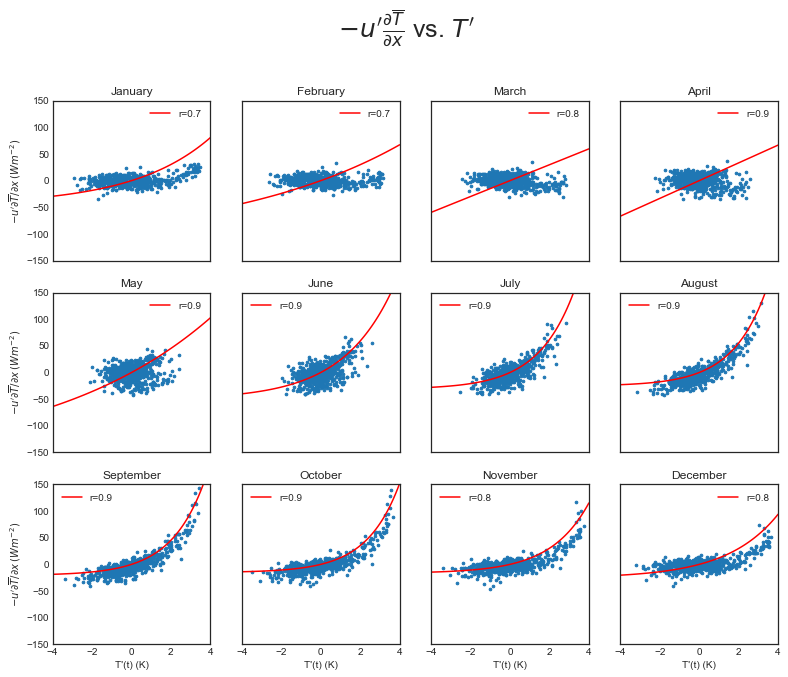

In [317]:
var_plot='qu_curr'

var1=np.reshape(heat_budget['tos'],(int(nyr/12),12))
var2=np.reshape(heat_budget[var_plot],(int(nyr/12),12))

fig, axes = plt.subplots(3,4,figsize=[13,10],sharex=True,sharey=True)
inc=0
for i in range(3):
    for j in range(4):
        monthi    = inc
        monthi_lag= int((np.roll(np.linspace(0,11,12),-inc+lag))[0])
        
        if inc-lag < 0:  
            xdata_lag = np.reshape(var1[0:-1,monthi_lag],(int(nyr/12-1)))
            xdata     = np.reshape(var1[1::,monthi],(int(nyr/12-1)))
            ydata     = np.reshape(var2[1::,monthi],(int(nyr/12-1)))
        else: 
            xdata_lag = np.reshape(var1[0::,monthi_lag],(int(nyr/12)))
            xdata     = np.reshape(var1[0::,monthi],(int(nyr/12)))
            ydata     = np.reshape(var2[0::,monthi],(int(nyr/12))) 
                                
        xx1 = np.linspace(-4,4,81)
        yy1 = exp_f(xx1, Q[var_plot][inc,0],Q[var_plot][inc,1],0) - exp_f(0, Q[var_plot][inc,0],Q[var_plot][inc,1],0)
        
        xx2 = xx1
        yy2 = exp_f(xx2, Q[var_plot][inc,2],Q[var_plot][inc,3],0) - exp_f(0, Q[var_plot][inc,2],Q[var_plot][inc,3],0)
        
        axes[i][j].scatter(xdata,ydata,s=7)
        axes[i][j].plot(xx1,yy1,color='r',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].set_ylim(-150,150)
        axes[i][j].set_xlim(-4,4)  
        axes[i][j].set_title(calendar.month_name[inc+1])
        
        axes[i][j].legend()
        if j == 0 :
            axes[i][j].set_ylabel("$-u'\partial\overline{T}/ \partial x}$ $(Wm^{-2})$")
        if i == 2 :
            axes[i][j].set_xlabel("T'(t) (K)")
            
        inc=inc+1
               
plt.suptitle(r" $-u'\frac{\partial \overline{T}}{\partial x}$ vs. $T'$",fontsize=25,y=1.01)
plt.show()

<center>__Figure 1.__ Scatterplot of the zonal advection by current anomalies ($-u'\partial \overline{T}/{\partial x}$) term (y axis) vs. the sea surface temperature anomalies $T'(t)$ (x axis) averaged over the Niño-3.4 region. The red curves are the best-fit exponential functions derived following the methodology described above. The correlation coefficient $r$ between the two variables is indicated in each panel. During January to May the fit of the $-u'\partial \overline{T}/{\partial x}$ term is compensated by the fit to $T'(t-t_0)$ (Figure 3, yellow line) resulting in a negligible feedback as seen in the scatter plot.

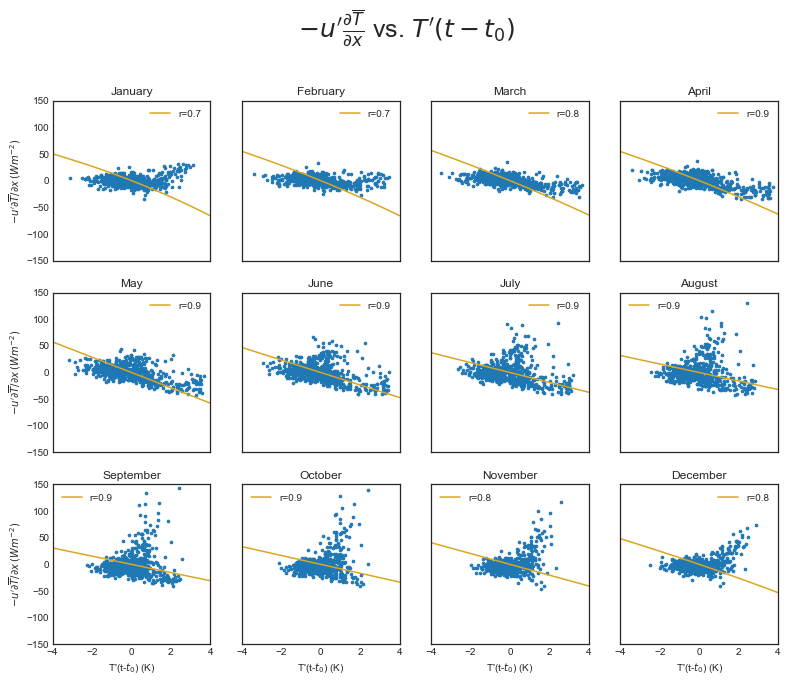

In [318]:
var_plot='qu_curr'

var1=np.reshape(heat_budget['tos'],(int(nyr/12),12))
var2=np.reshape(heat_budget[var_plot],(int(nyr/12),12))

fig, axes = plt.subplots(3,4,figsize=[13,10],sharex=True,sharey=True)
inc=0
for i in range(3):
    for j in range(4):
        monthi    = inc
        monthi_lag= int((np.roll(np.linspace(0,11,12),-inc+lag))[0])
        
        if inc-lag < 0:  
            xdata_lag = np.reshape(var1[0:-1,monthi_lag],(int(nyr/12-1)))
            xdata     = np.reshape(var1[1::,monthi],(int(nyr/12-1)))
            ydata     = np.reshape(var2[1::,monthi],(int(nyr/12-1)))
        else: 
            xdata_lag = np.reshape(var1[0::,monthi_lag],(int(nyr/12)))
            xdata     = np.reshape(var1[0::,monthi],(int(nyr/12)))
            ydata     = np.reshape(var2[0::,monthi],(int(nyr/12))) 
                                
        xx1 = np.linspace(-4,4,81)
        yy1 = exp_f(xx1, Q[var_plot][inc,0],Q[var_plot][inc,1],0) - exp_f(0, Q[var_plot][inc,0],Q[var_plot][inc,1],0)
        
        xx2 = xx1
        yy2 = exp_f(xx2, Q[var_plot][inc,2],Q[var_plot][inc,3],0) - exp_f(0, Q[var_plot][inc,2],Q[var_plot][inc,3],0)
        
        axes[i][j].scatter(xdata_lag,ydata,s=7)
        axes[i][j].plot(xx2,yy2,color='goldenrod',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].set_ylim(-150,150)
        axes[i][j].set_xlim(-4,4)  
        axes[i][j].set_title(calendar.month_name[inc+1])
        
        axes[i][j].legend()
        if j == 0 :
            axes[i][j].set_ylabel("$-u'\partial\overline{T}/ \partial x}$ $(Wm^{-2})$")
        if i == 2 :
            axes[i][j].set_xlabel("T'(t-$t_0$) (K)")
            
        inc=inc+1
               
plt.suptitle(r" $-u'\frac{\partial \overline{T}}{\partial x}$ vs. $T'(t-t_0)$",fontsize=25,y=1.01)

plt.show()

<center>__Figure 2.__ Scatterplot of the zonal advection by current anomalies ($-u'\partial \overline{T}/{\partial x}$) term (y axis) vs. the $lagged$ sea surface temperature anomalies $T'(t-t_0)$ (x axis) averaged over the Niño-3.4 region. The yellow curves are the best-fit exponential functions derived following the methodology described above. The correlation coefficient $r$ between the two variables is indicated in each panel.

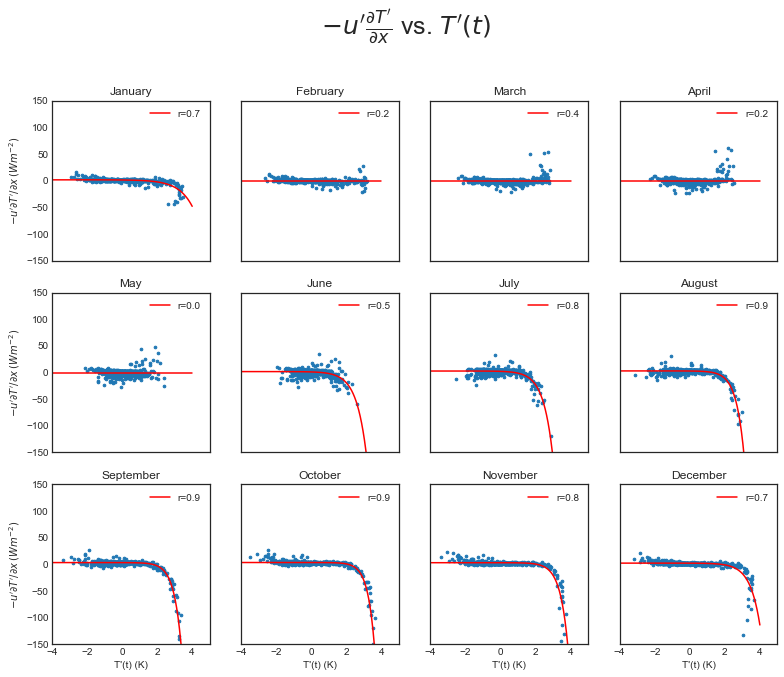

In [319]:
var_plot='qu_nl'

fig, axes = plt.subplots(3,4,figsize=[13,10],sharex=True,sharey=True)

inc=0
for i in range(3):
    for j in range(4):
    
        xdata=np.reshape(heat_budget['tos'],(int(nyr/12),12))[:,inc]
        ydata=np.reshape(heat_budget[var_plot],(int(nyr/12),12))[:,inc]
        
        xx = np.linspace(-4,4,100)
        yy = exp_f(xx, *Q[var_plot][inc,:])
        
        axes[i][j].scatter(xdata,ydata,s=7)
        axes[i][j].plot(xx,yy,color='r',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].legend()
        inc=inc+1
        axes[i][j].set_ylim(-150,150)
        axes[i][j].set_xlim(-4,5)
        axes[i][j].set_title(calendar.month_name[inc])
        if j == 0 :
            axes[i][j].set_ylabel("$-u'\partial T'/ \partial x}$ $(Wm^{-2})$")
        if i == 2 :
            axes[i][j].set_xlabel("T'(t) (K)")
               
plt.suptitle(r" $-u'\frac{{\partial T'}}{\partial x}$ vs. $T'(t)$",fontsize=25,y=1.01)


plt.show()

<center>__Figure 3.__ Scatterplot of the nonlinear zonal advection ($-u'.\partial T'/{\partial x}$) term (y axis) vs. the sea surface temperature anomalies $T'(t)$ (x axis) averaged over the Niño-3.4 region. The red curves are the best-fit exponential functions derived following the methodology described above. The correlation coefficient $r$ between the two variables is indicated in each panel.

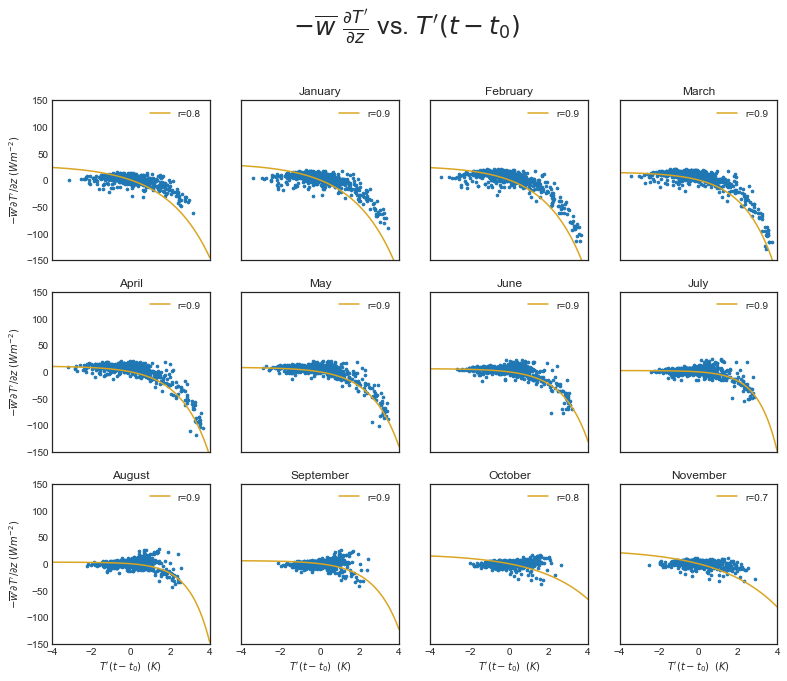

In [320]:
var_plot='qw_temp'

var1=np.reshape(heat_budget['tos'],(int(nyr/12),12))
var2=np.reshape(heat_budget[var_plot],(int(nyr/12),12))

fig, axes = plt.subplots(3,4,figsize=[13,10],sharex=True,sharey=True)
inc=0
for i in range(3):
    for j in range(4):
        monthi    = inc
        monthi_lag= int((np.roll(np.linspace(0,11,12),-inc+lag))[0])
        
        if inc-lag < 0:  
            xdata_lag = np.reshape(var1[0:-1,monthi_lag],(int(nyr/12-1)))
            xdata     = np.reshape(var1[1::,monthi],(int(nyr/12-1)))
            ydata     = np.reshape(var2[1::,monthi],(int(nyr/12-1)))
        else: 
            xdata_lag = np.reshape(var1[0::,monthi_lag],(int(nyr/12)))
            xdata     = np.reshape(var1[0::,monthi],(int(nyr/12)))
            ydata     = np.reshape(var2[0::,monthi],(int(nyr/12))) 
                                
        xx1 = np.linspace(-4,4,81)
        yy1 = exp_f(xx1, Q[var_plot][inc,0],Q[var_plot][inc,1],0) - exp_f(0, Q[var_plot][inc,0],Q[var_plot][inc,1],0)
        
        xx2 = xx1
        yy2 = exp_f(xx2, Q[var_plot][inc,2],Q[var_plot][inc,3],0) - exp_f(0, Q[var_plot][inc,2],Q[var_plot][inc,3],0)
        
        axes[i][j].scatter(xdata_lag,ydata,s=7)
#         axes[i][j].plot(xx1,yy1,color='r',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].plot(xx2,yy2,color='goldenrod',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].set_ylim(-150,150)
        axes[i][j].set_xlim(-4,4)  
        axes[i][j].set_title(calendar.month_name[inc])
        
        axes[i][j].legend()
        if j == 0 :
            axes[i][j].set_ylabel("$-\overline{w}'\partial T'/ \partial z}$ $(Wm^{-2})$")
        if i == 2 :
            axes[i][j].set_xlabel(r"$T'(t-t_{0}) \;\; (K)$")
            
        inc=inc+1
        
        
plt.suptitle(r" $-\overline{w}\;\frac{{\partial T'}}{\partial z}$ vs. $T'(t-t_0)$",fontsize=25,y=1.01)



plt.show()

<center>__Figure 4.__ Scatterplot of the vertical advection ($-(\overline{w}.{\partial T'}/{\partial z})$) term (y axis) vs. the $lagged$ sea surface temperature anomalies [T'(t-$t_0$)] (x axis) averaged over the Niño-3.4 region. The yellow curves are the best-fit exponential functions derived following the methodology described above. The correlation coefficient r between the two variables is indicated in each panel.

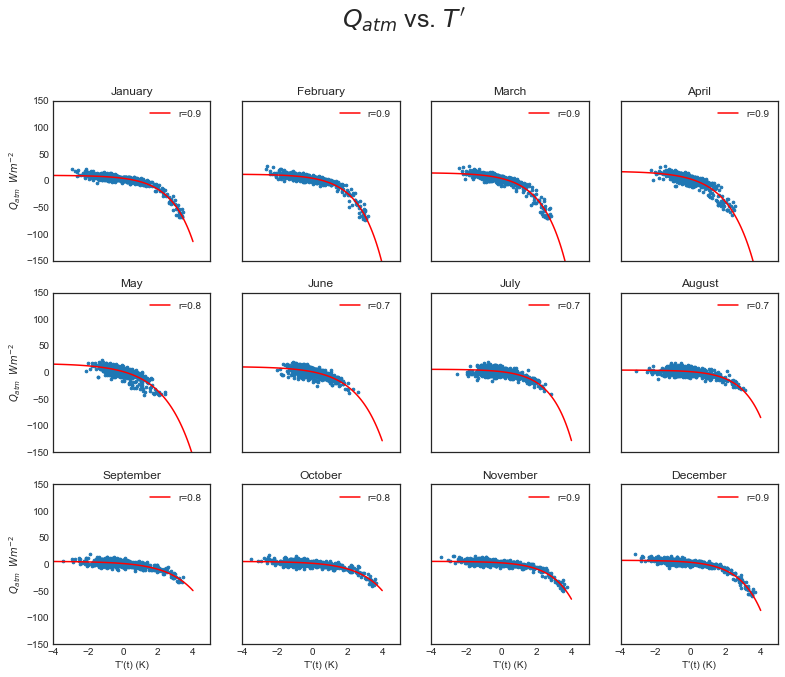

In [321]:
var_plot='qnet'

fig, axes = plt.subplots(3,4,figsize=[13,10],sharex=True,sharey=True)

inc=0
for i in range(3):
    for j in range(4):
    
        xdata=np.reshape(heat_budget['tos'],(int(nyr/12),12))[:,inc]
        ydata=np.reshape(heat_budget[var_plot],(int(nyr/12),12))[:,inc]
        
        xx = np.linspace(-4,4,100)
        yy = exp_f(xx, *Q[var_plot][inc,:])
        
        axes[i][j].scatter(xdata,ydata,s=7)
        axes[i][j].plot(xx,yy,color='r',label='r='+str(R[var_plot][inc])[0:3])
        axes[i][j].legend()
        inc=inc+1
        axes[i][j].set_ylim(-150,150)
        axes[i][j].set_xlim(-4,5)
        axes[i][j].set_title(calendar.month_name[inc])
        if j == 0 :
            axes[i][j].set_ylabel("$Q_{atm}\;\;Wm^{-2}$")
        if i == 2 :
            axes[i][j].set_xlabel("T'(t) (K)")
               
plt.suptitle(r"$Q_{atm}$ vs. $T'$",fontsize=25,y=1.01)

plt.show()

<center>__Figure 5.__ Scatterplot of the sea-air heat fluxes ($Q_{atm}$) (y axis) vs. the sea surface temperature anomalies $T'(t))$ (x axis) averaged over the Niño-3.4 region. The red curves are the best-fit exponential functions derived following the methodology described above. The correlation coefficient $r$ between the two variables is indicated in each panel.

### ENSO feedbacks

All terms of the heat budget (3) are fitted to an exponential function (4) or (5) following the examples above. The fitted functions provide $T'$ tendencies as a function of $T'$ or $T(t-t_0)$. The feedback functions $a$, $b$, $c$, $d$, of the NDO equation are derived as follows:

The Bjerknes feedback term, $aT'$, is obtained combining all the fitted functions positively correlated with $T'$.

The delayed thermocline feedback term, $-bT(t-t_0)$, is obtained combining the fitted functions negatively correlated with $T'(t-t_0)$.

The atmospheric damping term, $-cT'$, is the fit of $Q_{atm}$, negatively correlated with $T'$.

The nonlinear advection damping term, $-dT'$, is the fit of nonlinear advection terms negatively correlated with $T'$, as well as the residual term of the heat budget, that is also negatively correlated with $T'$.

The growth and decay rates associated with the ENSO feedbacks, $a$, $b$, $c$, and $d$ are obtained diving by the corresponding tendency functions by $T'$ or $T'(t-t_0)$ respectively.

A total ENSO growth rate $\sigma$ can be computed by replacing $T'$ with $\hat{T}e^{(\sigma t)}$ in (2) and solving:

<br>
$$\sigma = a - c -d - be^{-\sigma t_0}.$$
<br>

All growth and damping rates are plotted in Figure 6 below.

In [322]:
# Computation of the different feedbacks
a  = ndo['a'] #
b  = ndo['b'] # 
c  = ndo['c'] #
d  = ndo['d'] # 

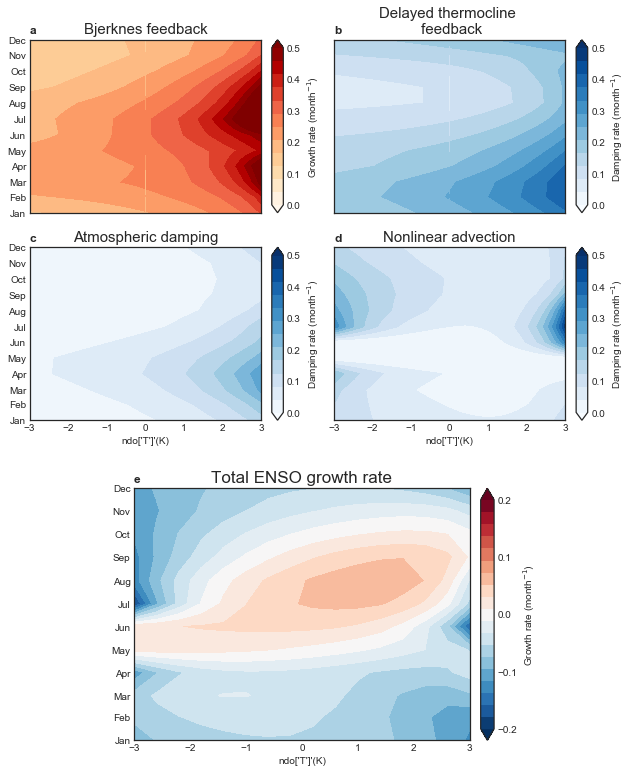

In [323]:
Temp_interp=np.arange(-3,3.4,0.4)
growth_tot=np.zeros((12,len(Temp_interp)))
gt=np.zeros((len(ndo['T'])))
for mo in range(12):
    for T in range(len(ndo['T'])): 
        func = lambda sig : sig + b[mo,T] * np.exp(- sig * (-ndo['lag'])) + c[mo,T] + d[mo,T]- a[mo,T]
        gt[T] =fsolve(func, 0)
    gti=interp1d(ndo['T'],gt,fill_value='extrapolate')
    growth_tot[mo,:] =gti(Temp_interp)
    
# Set up Y-axis time
years = [datetime(2018, i+1, 1) for i in range(12)]
name_feed=['a','b','c','d']
subtitle =['Bjerknes feedback','Delayed thermocline \n feedback',\
          'Atmospheric damping','Nonlinear advection']
cb_label=[r'Growth rate (month$^{-1}$)',r'Damping rate (month$^{-1}$)',r'Damping rate (month$^{-1}$)',r'Damping rate (month$^{-1}$)']
cmaps    =['OrRd','Blues','Blues','Blues']
p, ncol, nrow, vmin, vmax, Nlev, fmt={}, 2, 2, 0, 0.5, 13, mdates.DateFormatter('%b')


fig, axs = plt.subplots(nrow, ncol, figsize=(10,7), sharey=True, sharex=True)

inc=0
for i in range(nrow):
    for j in range(ncol):
        p[inc] = axs[i][j].contourf(ndo['T'],years,eval(name_feed[inc]),levels=np.linspace(vmin, vmax, Nlev)\
                                    ,cmap=cmaps[inc],extend='both')
        
        divider = make_axes_locatable(axs[i][j])
        cax = divider.append_axes("right", size="5%", pad=0.15)
        plt.colorbar(p[inc],cax=cax,ticks=mticker.MultipleLocator(0.1),label=cb_label[inc])
        axs[i][j].set_title(subtitle[inc],fontsize=15)
        axs[i][j].yaxis.set_major_formatter(fmt)
        axs[i][j].set_xlim(-3,3)
        axs[i][j].set_title(string.ascii_lowercase[inc], loc='left',fontweight="bold")
        if i ==1 :
            axs[i][j].set_xlabel("ndo['T']'(K)")
        inc=inc+1
        
        
ax2 = fig.add_axes([0.27, -0.51, 0.5, 0.5])
p2=ax2.contourf(Temp_interp,years,growth_tot,levels=np.linspace(-0.2, 0.2, 20),cmap='RdBu_r',extend='both')
ax2.yaxis.set_major_formatter(fmt)
ax2.set_xlabel("ndo['T']'(K)")
ax2.set_title('Total ENSO growth rate',fontsize=17)
ax2.set_xlim(-3,3)
ax2.set_title(string.ascii_lowercase[inc], loc='left',fontweight="bold")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="4%", pad=0.15)
plt.colorbar(p2,cax=cax,ticks=mticker.MultipleLocator(0.1),label=r'Growth rate (month$^{-1}$)')


plt.show()

<center>__Figure 6.__ Growth and damping rates (month$^{-1}$) governing the nonlinear delayed-oscillator equation (1) as a function of the Niño-3.4 SST anomalies (x axis) and calendar month (y axis). (a) Growth rate a associated with the Bjerknes feedback. Damping rates (b), (c), and (d) associated with the delayed thermocline feedback, atmospheric damping, and nonlinear advection, respectively. (e) Total growth rate resulting from the combined effect of all the feedbacks, a measure of the NDO’s instability. Positive (negative) values indicate unstable (damped) growth of Niño-3.4 SST anomalies.

#  Integrating the NDO

We integrate $T'(t)$ from equation (2) using a forward finite difference as follows: 

<br>
$$T^{n+1}=T^{n}+aT^{n}-bT^{n-t_0}-cT^{n}-dT^{n}+N_0 \eta^{n} \;\;\;\;\; (7)$$
<br>

We use a timestep of 1 month. At each timestep we evaluate the functions $a$, $b$, $c$, and $d$ for the given value of $T^n$ and $T^{n-t_0}$, and the corresponding calendar month, to compute the right hand side of (7). The $N_0\eta^{n}$ terms represents tendencies driven  by external stochastic forcing, which here we represent as Gaussian noise uncorrelated from the previous months (i.e. white) added in each time step. The $\eta^{n}$ values are generated using Phython's skewnorm function and have zero mean, unit standard deviation, and zero skewness. The amplitude of the external noise, $N_0$, is constant and determined as described below.  

The exponential functions used to fit the terms of the heat budget do not guarantee that the feedbacks will be representative of the physics of CESM1 beyond the range of values simulated by CESM1. Sometimes $T^{n+1}$ computed from (6) can enter a regime beyond that simulated by CESM1 and result in an overshoot due to umbalanced nonlinear feedbacks. We prevent this from happening by limiting $T^n$ to not exceed the maximum and minimum values of the Niño-3.4 SST index from the CESM1 simulations. Whenever the NDO produces an SST anomaly larger (smaller) than these values, $T_{lim}$, we compute the feedback functions as $a(T_{lim},mon)$, $b(T_{lim},mon)$, $c(T_{lim},mon)$, and $d(T_{lim},mon)$, instead of using $T^n$ to retrieve the values of $a$, $b$, $c$, and $d$. 


In [324]:
# Number of years and member of the experiment 
nyears     = int(len(ndo['cesm1'])/12)
nmember = 10

# Interpolation function 
ai,bi,ci,di=defaultdict(dict),defaultdict(dict),defaultdict(dict),defaultdict(dict)
for month in range(12):
    ai[month]  = interp1d(ndo['T'], a[month,:],fill_value='extrapolate')  
    bi[month]  = interp1d(ndo['T'], b[month,:],fill_value='extrapolate')  
    ci[month]  = interp1d(ndo['T'], c[month,:],fill_value='extrapolate')  
    di[month]  = interp1d(ndo['T'], d[month,:],fill_value='extrapolate') 

# Set up the initial conditions 
T_init=ndo['cesm1'][0:13]
T_ndo =np.zeros((nmember,nyears*12))
Growth_ndo =np.zeros((nmember,nyears*12))

for member in range(nmember): 
    inc=0 
    for year in range(nyears):
        for month in range(12):

            # initialize the NDO first time steps 
            if inc == 0: 
                T=T_init

            # Limits for feedback computation to avoid the biases in the extremes SST
            if T[-1] > ndo['cesm1'].max()-0.5 : 
                Tn = ndo['cesm1'].max()-0.5  
            elif T[-1] < ndo['cesm1'].min()+0.5:
                Tn=ndo['cesm1'].min()+0.5
            else:
                Tn=T[-1]
            
            # Lagged SST 
            Tnlag=T[-1-ndo['lag']]
             
            # Contribution from the Bjerknes feedback A=a*T'(t)
            A=ai[month](Tn)*Tn
            
            # Contribution from the Delayed negative feedback B=b*T'(t-t0) 
            B=bi[month](Tnlag)*Tnlag
                
            # Contribution from the Atmospheric damping 
            C=ci[month](Tn)*Tn

            # Contribution from the Non-linear negative feedback 
            D=di[month](Tn)*Tn
            
            # Contribution from the Noise
            N = skewnorm.rvs(ndo['noise'][1],loc=ndo['noise'][1], size=1)*ndo['noise'][0]
            if Tn>3:
                N=0
      
            # Computation T_n+1 (first order forward finite difference scheme)     
            Tnp1= T[-1] + ( A - B - C - D ) + N 

#             SST Limits to prevent the model to crash 
            if  (Tnp1) > ndo['cesm1'].max():
                Tnp1=ndo['cesm1'].max()
            if  (Tnp1) < ndo['cesm1'].min():
                Tnp1=ndo['cesm1'].min()
                
            # We update the T array with Tnp1 
            T= np.append(T,Tnp1) 

            inc=inc+1
        
    
    T_ndo[member,:]=T[12:-1]

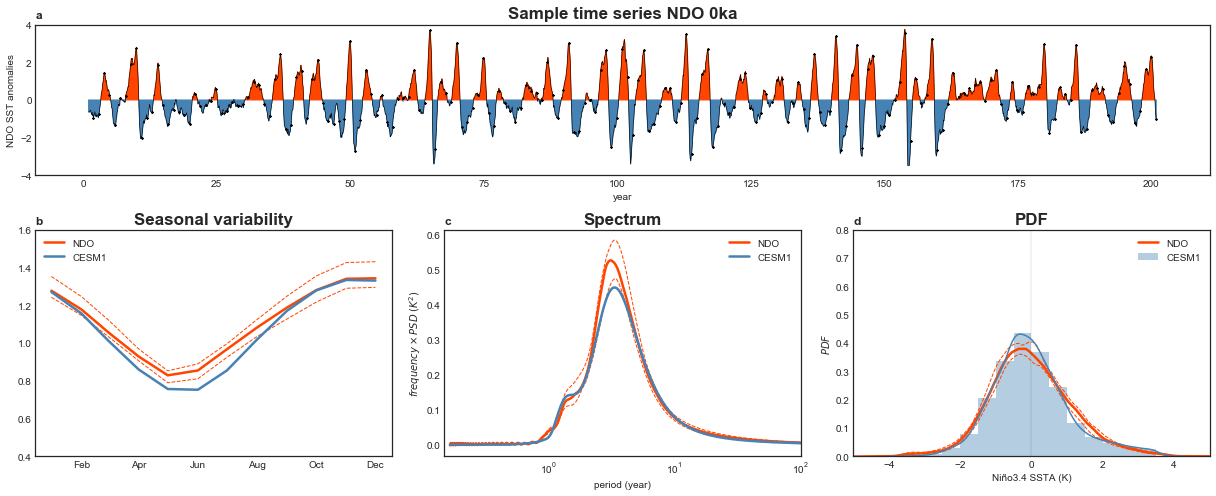

In [325]:
fig=plt.figure(figsize=(17,7))
gs = gridspec.GridSpec(2, 3,height_ratios=[1, 1.5])

# 5 month running mean 
T_ndo=T_ndo[~np.isnan(np.nanmean(T_ndo,axis=1)),:]
nmember=nm=len(np.squeeze(np.where(~np.isnan(np.nanmean(T_ndo,axis=1)) == True)))

# ----------------------   First plot time_series ----------------------
ax1 = plt.subplot(gs[0:3])


# nb years to display 
nyr_plot=200

# We pick one member to plot
T_plot=T_ndo[0,:].squeeze()  

# creation time axis 
ti=np.linspace(0,nyr_plot-1/12,len(T_plot[0:nyr_plot*12]))

ax1.plot((ti+1),T_plot[0:nyr_plot*12],color='k',linewidth=0.59)
ax1.plot((ti+1)[11::12],T_plot[0:nyr_plot*12][11::12],color='k',marker='*',linewidth=0,markersize=2)
ax1.fill_between(ti+1,T_plot[0:nyr_plot*12],where=T_plot[0:nyr_plot*12] >= 0,color='orangered')
ax1.fill_between(ti+1,T_plot[0:nyr_plot*12],where=T_plot[0:nyr_plot*12] <= 0,color='steelblue')
ax1.set_ylim(-4,4)
ax1.set_xlabel('year')
ax1.set_ylabel('NDO SST anomalies')
ax1.set_title('Sample time series NDO '+CASE, fontsize='17',weight='semibold')
ax1.set_title('a', loc='left',fontweight="bold")

# -------------------   Seasonal ENSO variability  ---------------------
ax2 = plt.subplot(gs[3])

# creation time axis 
xmonth= [datetime(2018, i+1, 1) for i in range(12)]

# Compute the std.dev of CESM1 Niño3.4 for each calendar month
seas_std_cesm     = [np.std(ndo['cesm1'][i::12]) for i in range(12)]

# Compute the std.dev of each NDO member for each calendar month 
seas_std_ndo=np.zeros((nmember,12))
for member in range(nmember): 
    seas_std_ndo[member,:] = [np.nanstd(T_ndo[member,:][i::12]) for i in range(12)]

seas_std_ndo_per=np.percentile(seas_std_ndo, (0,50,100), axis=0)
ax2.plot(xmonth,seas_std_ndo_per[1,:],color='orangered',label='NDO',linewidth=2.5)
ax2.plot(xmonth,seas_std_ndo_per[0,:],color='orangered',linestyle='--',linewidth=1)
ax2.plot(xmonth,seas_std_ndo_per[2,:],color='orangered',linestyle='--',linewidth=1)
ax2.plot(xmonth,seas_std_cesm,label='CESM1',color='steelblue',linewidth=2.5)

fmt=mdates.DateFormatter('%b')
ax2.xaxis.set_major_formatter(fmt)
ax2.set_title('Seasonal variability', fontsize='17',weight='semibold')
ax2.set_ylim(0.4,1.6)
ax2.legend()
ax2.set_title('b', loc='left',fontweight="bold")



# ----------------------------   Spectrum   ----------------------------
ax3 = plt.subplot(gs[4])

psd_cesm = CORRELOGRAMPSD(ndo['cesm1'], ndo['cesm1'], lag=12*5)
f_cesm = np.linspace(-0.5, 0.5, len(psd_cesm))
psd_cesm = cshift(psd_cesm, len(psd_cesm)/2)[f_cesm >0]

for member in range(nmember): 
    psd_ndo1 = CORRELOGRAMPSD(T_ndo[member,:],T_ndo[member,:], lag=12*5)
    if member == 0:
        f_ndo = np.linspace(-0.5, 0.5, len(psd_ndo1))  
        psd_ndo=np.zeros((nmember,int(len(psd_ndo1)/2)))
        
    psd_ndo[member,:] = cshift(psd_ndo1, len(psd_ndo1)/2)[f_ndo >0]

psd_ndo_per=np.nanpercentile(psd_ndo, (0,50,100), axis=0)
   
ax3.semilogx(1./f_ndo[f_ndo >0]/12, psd_ndo_per[1,:]*f_ndo[f_ndo >0],c='orangered',linewidth=2.5,label='NDO')
ax3.semilogx(1./f_ndo[f_ndo >0]/12, psd_ndo_per[0,:]*f_ndo[f_ndo >0],c='orangered',linewidth=1,linestyle='--')
ax3.semilogx(1./f_ndo[f_ndo >0]/12, psd_ndo_per[2,:]*f_ndo[f_ndo >0],c='orangered',linewidth=1,linestyle='--')
ax3.semilogx(1./f_cesm[f_cesm >0]/12, psd_cesm*f_cesm[f_cesm >0],label='CESM1',c='steelblue',linewidth=2.5)

ax3.set_xlim(0.15,100)
ax3.set_xlabel('period (year)')
ax3.set_ylabel(r'$frequency \times PSD \; (K^{2})$')

ax3.legend()
ax3.set_title('Spectrum', fontsize='17',weight='semibold')
ax3.set_title('c', loc='left',fontweight="bold")



# ----------------------------   Distribution   ----------------------------
ax4 = plt.subplot(gs[5])

sns.set_style("white")
xloc=np.linspace(-5,5,100)

dist_ndo =np.zeros((nmember,len(xloc)))
for member in range(nmember): 
    dist=sns.distplot(T_ndo[member,:],hist=False,kde_kws={'alpha': 0},ax=ax4).get_lines()[member].get_data()
    inter=interp1d(dist[0], dist[1],fill_value='extrapolate')
    dist_ndo[member,:]=inter(xloc)
    
dist_ndo_per=np.percentile(dist_ndo, (0,50,100), axis=0)
ax4.plot(xloc,dist_ndo_per[1,:],color='orangered',linewidth=2.5,label='NDO')
ax4.plot(xloc,dist_ndo_per[0,:],color='orangered',linewidth=1,linestyle='--')
ax4.plot(xloc,dist_ndo_per[2,:],color='orangered',linewidth=1,linestyle='--')
ax4.plot([0,0],[0,1],color='k',linewidth=0.1)
sns.distplot(ndo['cesm1'], hist=True,kde=True,hist_kws={'alpha': 0.4},label='CESM1',norm_hist=True,bins=np.arange(-4,4,0.5),ax=ax4,color='steelblue')

ax4.set_title('PDF', fontsize='17',weight='semibold')
ax4.set_xlim(-5,5)
ax4.set_ylim(0,0.8)
ax4.set_xlabel('Niño3.4 SSTA (K)')
ax4.set_ylabel(r'$PDF$')
ax4.set_title('d', loc='left',fontweight="bold")


ax4.legend()

plt.tight_layout()
plt.show()

<center> __Figure 7.__ __(a)__ Sample of the $T'(t)$ time series obtained for $N_0 = 0.11$ K/mon. __(b)__ Standard deviation of $T'(t)$ as a function of calendar month. __(c)__ Power spectrum and __(d)__ probability density function of $T'(t)$. Solid red curves show the mean among 10 realizations of the NDO with the same duration as the CESM1 simulation (blue curves). Dashed red lines

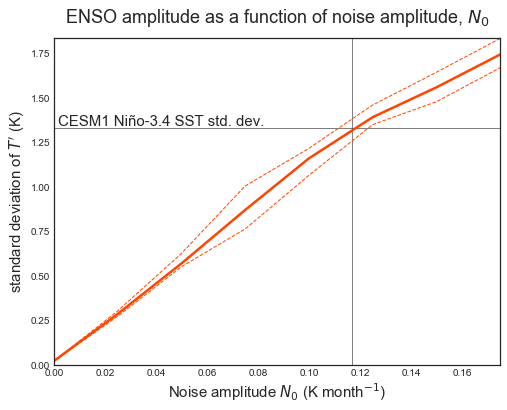

In [326]:
# Number of years and member of the experiment 
nyears     = int(len(ndo['cesm1'])/12)
nmember = 10
noise=np.arange(0,ndo['noise'][0]+0.075,0.025)

# Set up the initial conditions 
T_init=ndo['cesm1'][0:13]
T_ndo_ns =np.zeros((len(noise),nmember,nyears*12))
Growth_ndo =np.zeros((nmember,nyears*12))

inc_ns=0
for ns in noise:
    for member in range(nmember): 
        inc=0 
        for year in range(nyears):
            for month in range(12):

                # initialize the NDO first time steps 
                if inc == 0: 
                    T=T_init

                # Limits for feedback computation to avoid the biases in the extremes SST
                if T[-1] > ndo['cesm1'].max()-0.5 : 
                    Tn = ndo['cesm1'].max()-0.5  
                elif T[-1] < ndo['cesm1'].min()+0.5:
                    Tn=ndo['cesm1'].min()+0.5
                else:
                    Tn=T[-1]

                # Lagged SST 
                Tnlag=T[-1-ndo['lag']]

                # Contribution from the Bjerknes feedback A=a*T'(t)
                A=ai[month](Tn)*Tn

                # Contribution from the Delayed negative feedback B=b*T'(t-t0) 
                B=bi[month](Tnlag)*Tnlag

                # Contribution from the Atmospheric damping 
                C=ci[month](Tn)*Tn

                # Contribution from the Non-linear negative feedback 
                D=di[month](Tn)*Tn

                # Contribution from the Noise
                N = skewnorm.rvs(ndo['noise'][1],loc=ndo['noise'][1], size=1)*ns
                if Tn>3:
                    N=0

                # Computation T_n+1 (first order forward finite difference scheme)     
                Tnp1= T[-1] + ( A - B - C - D ) + N 

    #             SST Limits to prevent the model to crash 
                if  (Tnp1) > ndo['cesm1'].max():
                    Tnp1=ndo['cesm1'].max()
                if  (Tnp1) < ndo['cesm1'].min():
                    Tnp1=ndo['cesm1'].min()

                # We update the T array with Tnp1 
                T= np.append(T,Tnp1) 

                inc=inc+1

    
        T_ndo_ns[inc_ns,member,:]=T[12:-1]
    inc_ns=inc_ns+1
    

# Plot 
plt.figure(figsize=[8,6])

T_ndo_ns_sdev=np.std(T_ndo_ns[:,:,11::12],axis=2)
T_ndo_ns_sdev_per=np.percentile(T_ndo_ns_sdev, (0,50,100), axis=1)

plt.plot([ndo['noise'][0],ndo['noise'][0]],[0,1000],color='k',linewidth=0.5)
plt.plot([0,1000],[np.std(ndo['cesm1'][11::12]),np.std(ndo['cesm1'][11::12])],color='k',linewidth=0.5)


plt.plot(noise,T_ndo_ns_sdev_per[0,:],color='orangered',linewidth=1,linestyle='--')
plt.plot(noise,T_ndo_ns_sdev_per[1,:],color='orangered',linewidth=2.5,label='NDO')
plt.plot(noise,T_ndo_ns_sdev_per[2,:],color='orangered',linewidth=1,linestyle='--')


plt.text(0.0015, np.std(ndo['cesm1'][11::12])+0.015, 'CESM1 Niño-3.4 SST std. dev.', fontsize=15)

plt.xlabel(r'Noise amplitude $N_0$ (K month$^{-1}$)',fontsize=15)
plt.ylabel(r"standard deviation of $T'$ (K)",fontsize=15)

plt.xlim(noise.min(),noise.max())
plt.ylim(0,T_ndo_ns_sdev_per[2,:].max())
plt.title(r'ENSO amplitude as a function of noise amplitude, $N_0$',fontsize=18,y=1.03)

plt.show()

<center>__Figure 8.__ Dependence of the standard deviation of $T'(t)$ on the amplitude of the noise, $N_0$, used to drive the NDO equation (7).

In [327]:
# Hide code cells in nbviewer
js = """ <script type='text/javascript' src='https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js'></script> """ 
display(HTML(js))

# Center plots 
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))